In [1]:
import torch
import os
import numpy as np
import cv2
import scipy

import matplotlib.pyplot as plt

from scipy.ndimage import convolve

In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [42]:
from test_batch import box_distance, collect_predict,cache_to_arrowed, test_arrow, draw_predict_single,load_predict,smooth_predict,DummyPointer

In [7]:
def plot_trace(x,y, alpha=1.0):
    n = x.shape[0]
    plt.plot(x[:n//3],y[:n//3],'-o',color='r', alpha=alpha)
    plt.plot(x[n//3:n//3*2],y[n//3:n//3*2],'-o',color='g', alpha=alpha)
    plt.plot(x[n//3*2:],y[n//3*2:],'-o',color='b', alpha=alpha)


In [9]:
background_bgr = cv2.imread('images/images53.jpg')
background = cv2.cvtColor(background_bgr, cv2.COLOR_BGR2RGB)

In [20]:
def adaptive_chain_smoother(arr):
    n_K = max(len(arr) //3, 1)
    K = np.ones(n_K)/n_K
    return convolve(arr, K, mode ='nearest')

collected = collect_predict("output003_cache_split", pixel_threshold = 60, verbose=True,
                    K_size = 60, K_delta_size=40, chain_smoother = adaptive_chain_smoother, jump_tol = 10)

12 chain detected


3271


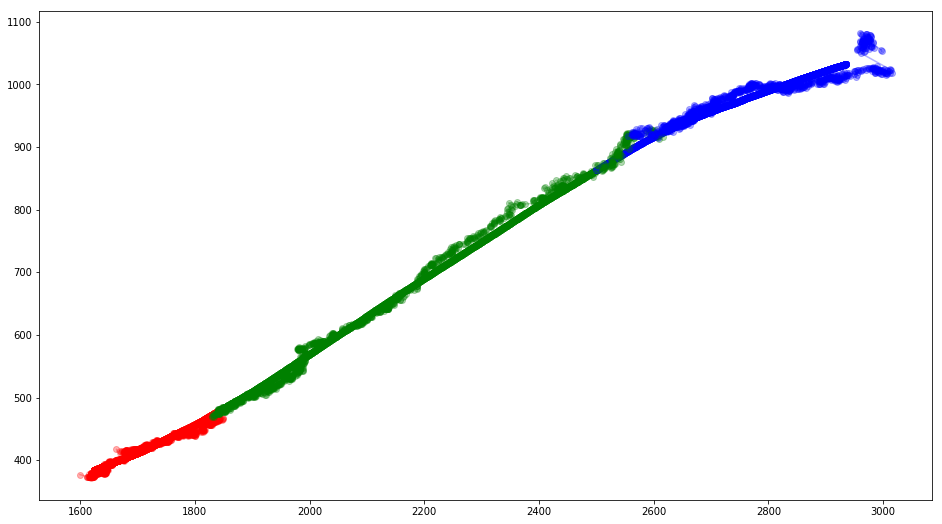

1862


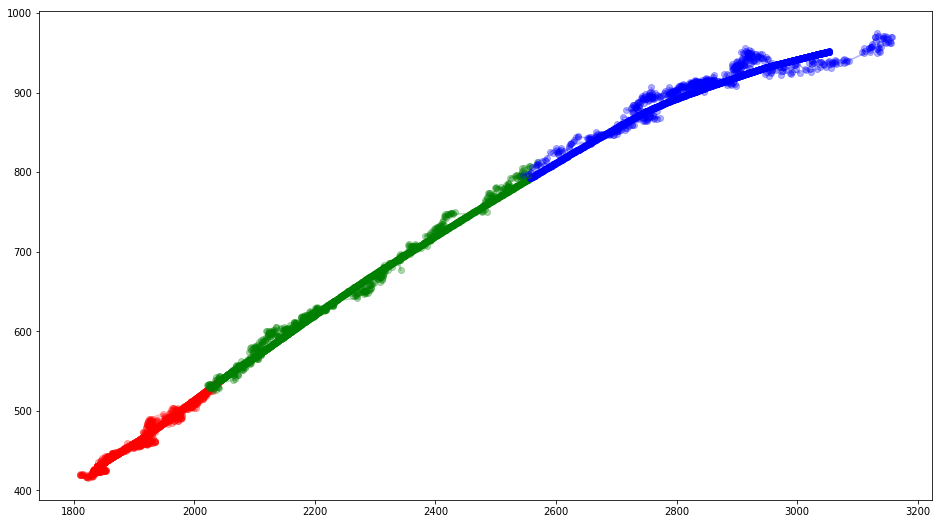

1574


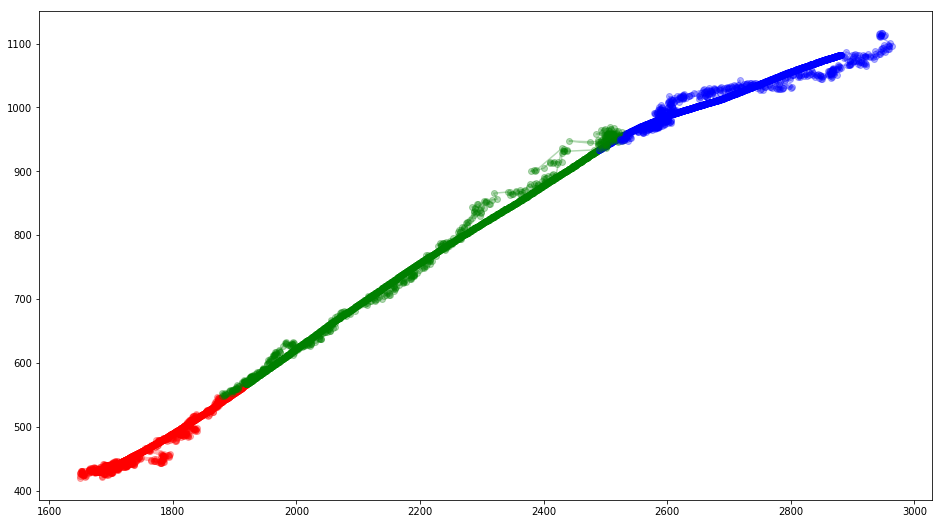

37


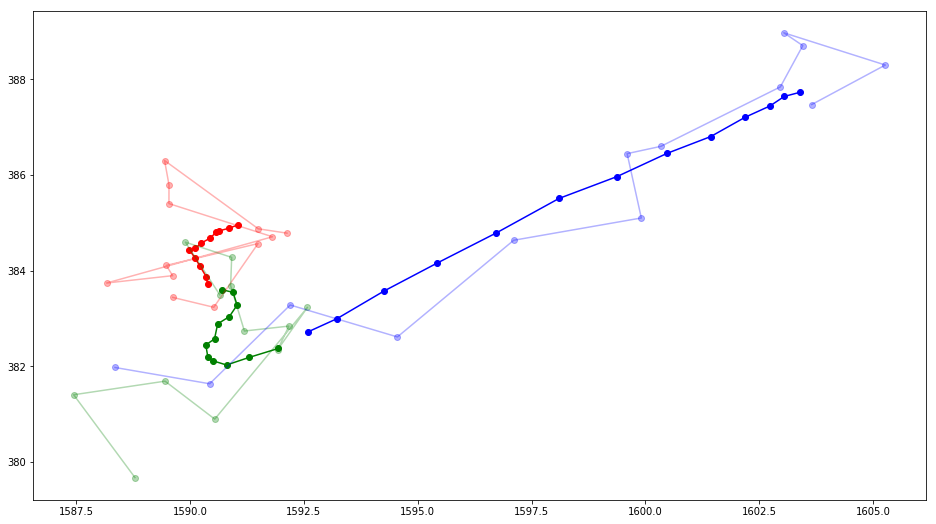

11


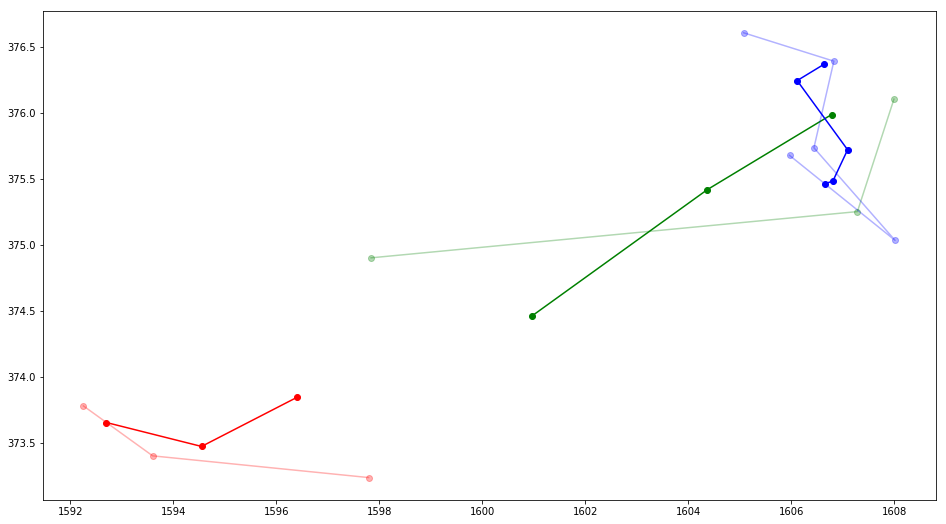

In [21]:
for chain in sorted([chain for chain in collected['chain_list']], reverse=True, key=len)[:5]:
    pt_arr = np.array([box['pt'] for box in chain])
    pt_smoothed_arr = np.array([box['pt_smoothed'] for box in chain])
    if len(pt_arr) <2:
        print('suppressed')
        continue
    print(len(pt_arr))
    x,y = pt_arr[:,::2].mean(axis=1),pt_arr[:,1::2].mean(axis=1)
    x_bar,y_bar = pt_smoothed_arr[:,::2].mean(axis=1),pt_smoothed_arr[:,1::2].mean(axis=1)
    
    plt.figure(figsize=(16,9))
    plot_trace(x_bar, y_bar)
    plot_trace(x,y, alpha=0.3)
    plt.show()

3271


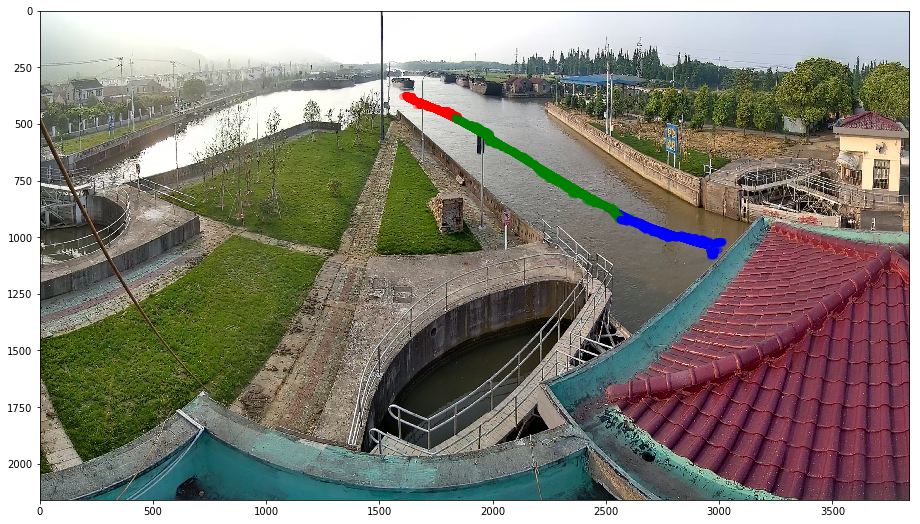

1862


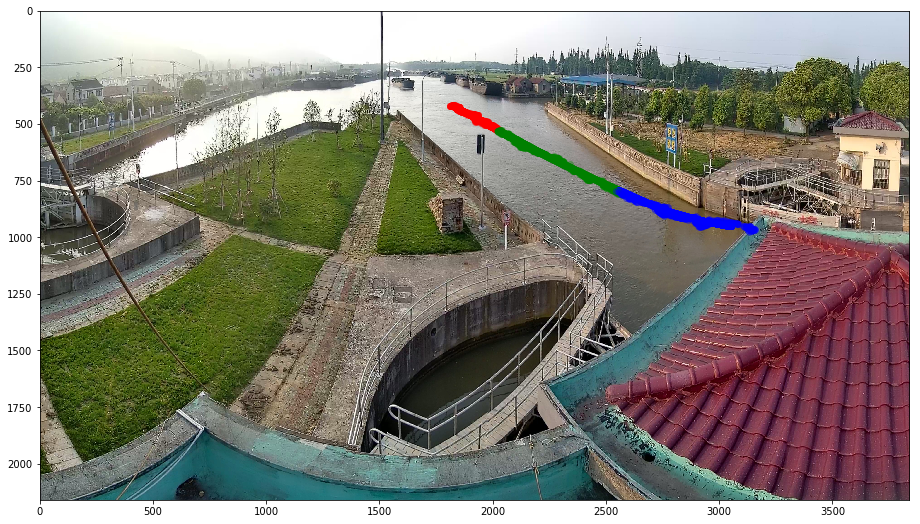

1574


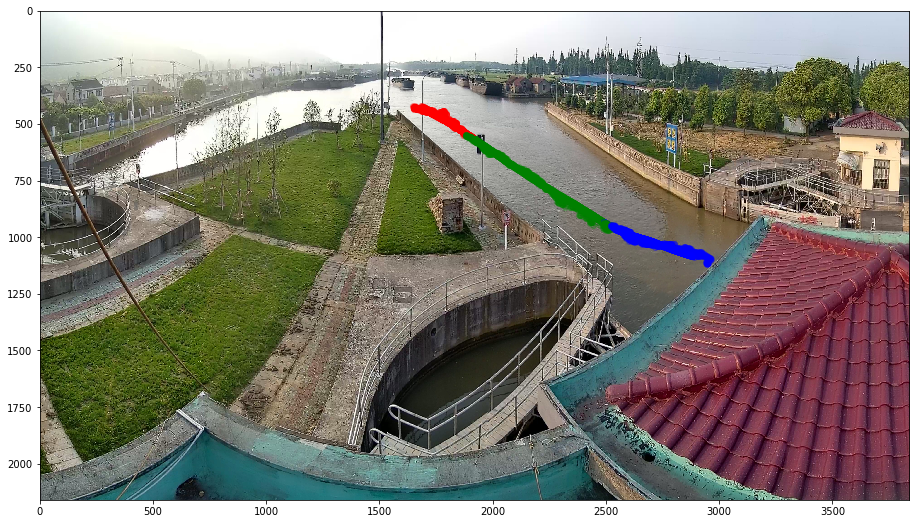

37


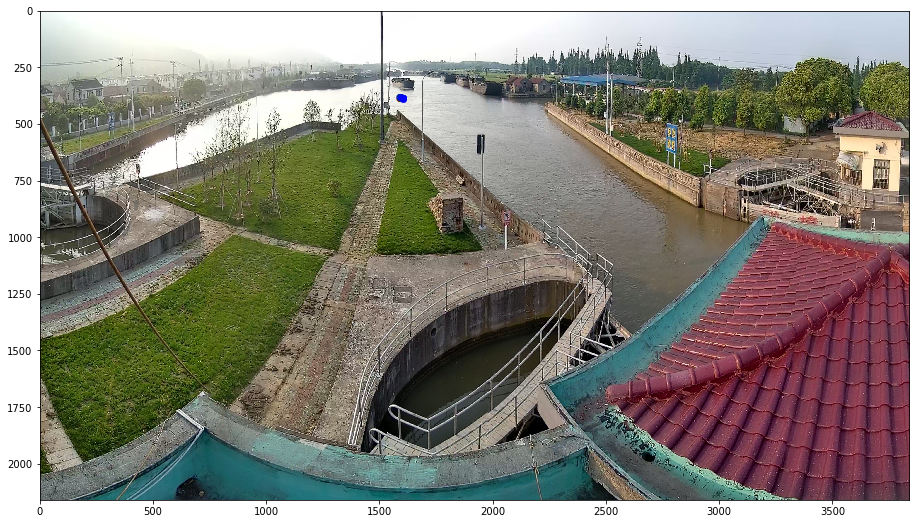

11


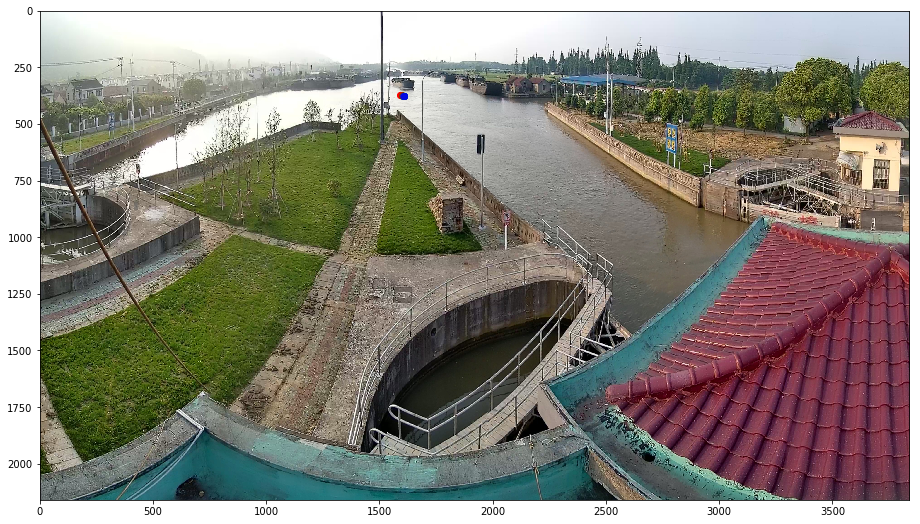

In [14]:
for chain in sorted([chain for chain in collected['chain_list']], reverse=True, key=len)[:5]:
    pt_arr = np.array([box['pt'] for box in chain])
    pt_smoothed_arr = np.array([box['pt_smoothed'] for box in chain])
    if len(pt_arr) <2:
        print('suppressed')
        continue
    print(len(pt_arr))
    x,y = pt_arr[:,::2].mean(axis=1),pt_arr[:,1::2].mean(axis=1)
    x_bar,y_bar = pt_smoothed_arr[:,::2].mean(axis=1),pt_smoothed_arr[:,1::2].mean(axis=1)
    
    plt.figure(figsize=(16,9))
    plot_trace(x_bar, y_bar)
    plot_trace(x,y, alpha=0.3)
    plt.imshow(background)
    plt.show()

目前看起来跳匹配效果还行，这就为利用其修复算法失匹配的情况提供了便利。

In [22]:
collected['predict_cache'][0][:5]

[{'score': tensor(0.6894, device='cpu'),
  'label_name': 'boat',
  'pt': array([1473.6853 ,  314.8148 , 1710.5776 ,  454.76007], dtype=float32),
  'matched': True,
  'head': True,
  'frame': 0,
  'pt_smoothed': array([1471.4888 ,  314.67554, 1710.645  ,  455.2528 ], dtype=float32),
  'pt_smoothed_next': array([1471.0546 ,  314.56512, 1710.6609 ,  455.2151 ], dtype=float32),
  'pt_next': array([1472.1425 ,  315.77893, 1710.8601 ,  453.97778], dtype=float32),
  'delta': array([-0.20922852, -0.07406616], dtype=float32),
  'delta_smoothed': array([-0.1059082 , -0.10852204], dtype=float32),
  'chain': <test_batch.DummyPointer at 0x1b3fa4d4fd0>},
 {'score': tensor(0.6024, device='cpu'),
  'label_name': 'boat',
  'pt': array([2840.8416,  890.8509, 3174.3467, 1177.7273], dtype=float32),
  'matched': True,
  'head': True,
  'frame': 0,
  'pt_smoothed': array([2840.8416,  890.8509, 3174.3467, 1177.7273], dtype=float32),
  'chain': <test_batch.DummyPointer at 0x1b3838272e8>}]

In [24]:
collected['chain_list'][0][:5]

[{'score': tensor(0.6894, device='cpu'),
  'label_name': 'boat',
  'pt': array([1473.6853 ,  314.8148 , 1710.5776 ,  454.76007], dtype=float32),
  'matched': True,
  'head': True,
  'frame': 0,
  'pt_smoothed': array([1471.4888 ,  314.67554, 1710.645  ,  455.2528 ], dtype=float32),
  'pt_smoothed_next': array([1471.0546 ,  314.56512, 1710.6609 ,  455.2151 ], dtype=float32),
  'pt_next': array([1472.1425 ,  315.77893, 1710.8601 ,  453.97778], dtype=float32),
  'delta': array([-0.20922852, -0.07406616], dtype=float32),
  'delta_smoothed': array([-0.1059082 , -0.10852204], dtype=float32),
  'chain': <test_batch.DummyPointer at 0x1b3fa4d4fd0>},
 {'score': tensor(0.6963, device='cpu'),
  'label_name': 'boat',
  'pt': array([1472.1425 ,  315.77893, 1710.8601 ,  453.97778], dtype=float32),
  'matched': True,
  'frame': 1,
  'pt_smoothed': array([1471.0546 ,  314.56512, 1710.6609 ,  455.2151 ], dtype=float32),
  'pt_smoothed_next': array([1470.4968 ,  314.42657, 1710.7771 ,  455.24112], dtype=

In [32]:
for i,chain in enumerate(collected['chain_list']):
    print("chain {}  length={}".format(i, len(chain)))
    for box,next_box in zip(chain[:-1], chain[1:]):
        if box['frame'] +1 != next_box['frame']:
            print(box['frame'],next_box['frame'])

chain 0  length=37
31 33
chain 1  length=1
chain 2  length=4
54 60
60 62
chain 3  length=1574
127 131
1036 1038
chain 4  length=1862
1148 1155
1166 1169
1384 1386
1391 1394
1394 1399
1404 1406
1406 1413
1414 1416
1421 1425
1443 1445
1450 1453
1453 1457
1457 1459
1459 1463
2891 2894
2896 2898
2926 2928
2933 2938
2938 2942
chain 5  length=1
chain 6  length=1
chain 7  length=11
1222 1224
1224 1228
1229 1232
chain 8  length=3271
1260 1270
1270 1273
1319 1321
1437 1440
1453 1455
1458 1461
1477 1481
1488 1490
1490 1492
1556 1567
1571 1573
1573 1575
1576 1585
4491 4494
4495 4497
4502 4504
4574 4577
4577 4579
chain 9  length=4
3007 3010
3010 3012
chain 10  length=3
4493 4496
chain 11  length=1


In [31]:
for box,next_box in zip(collected['chain_list'][1][:-1],collected['chain_list'][1][1:]):
    if box['frame'] +1 != next_box['frame']:
        print(box['frame'],next_box['frame'])

现在的数据结构的互相牵制太复杂了，直接中间处理凭空插进去有点麻烦，还需要维护。。但重新搞一个再构建又会有平滑值的矛盾。
我现在考虑是插入一些只有`pt_smoothed`值定义的结构，并加以专门的key标识以免造成误解。

虽然当前API下只直接用了`collected`里的`predict_cache_map`值，但不进行同步更新后患无穷，就像之前那个匹配错误一样。

In [33]:
box

{'score': tensor(0.7479, device='cpu'),
 'label_name': 'boat',
 'pt': array([2671.317 ,  842.998 , 3230.5837, 1261.4703], dtype=float32),
 'matched': True,
 'frame': 4493,
 'pt_smoothed': array([2671.317 ,  842.998 , 3230.5837, 1261.4703], dtype=float32),
 'pt_smoothed_next': array([2677.862 ,  844.0131, 3238.8442, 1258.4349], dtype=float32),
 'pt_next': array([2677.862 ,  844.0131, 3238.8442, 1258.4349], dtype=float32),
 'delta': array([ 7.402832 , -1.0101318], dtype=float32),
 'delta_smoothed': array([ 5.7801085, -1.0557648], dtype=float32),
 'chain': <test_batch.DummyPointer at 0x1b3834f1a58>}

In [34]:
collected.keys()

dict_keys(['predict_cache', 'predict_cache_map', 'id2key', 'key2id', 'chain_list'])

In [43]:
collected['predict_cache'][0] # boxes in first(id = zero) frame

[{'score': tensor(0.6894, device='cpu'),
  'label_name': 'boat',
  'pt': array([1473.6853 ,  314.8148 , 1710.5776 ,  454.76007], dtype=float32),
  'matched': True,
  'head': True,
  'frame': 0,
  'pt_smoothed': array([1471.4888 ,  314.67554, 1710.645  ,  455.2528 ], dtype=float32),
  'pt_smoothed_next': array([1471.0546 ,  314.56512, 1710.6609 ,  455.2151 ], dtype=float32),
  'pt_next': array([1472.1425 ,  315.77893, 1710.8601 ,  453.97778], dtype=float32),
  'delta': array([-0.20922852, -0.07406616], dtype=float32),
  'delta_smoothed': array([-0.1059082 , -0.10852204], dtype=float32),
  'chain': <test_batch.DummyPointer at 0x1b3fa4d4fd0>},
 {'score': tensor(0.6024, device='cpu'),
  'label_name': 'boat',
  'pt': array([2840.8416,  890.8509, 3174.3467, 1177.7273], dtype=float32),
  'matched': True,
  'head': True,
  'frame': 0,
  'pt_smoothed': array([2840.8416,  890.8509, 3174.3467, 1177.7273], dtype=float32),
  'chain': <test_batch.DummyPointer at 0x1b3838272e8>}]

In [69]:
list(collected['predict_cache_map'].keys())[:5]

['thumb00001.cache',
 'thumb00002.cache',
 'thumb00003.cache',
 'thumb00004.cache',
 'thumb00005.cache']

In [57]:
def interpolation_box(box_begin, box_end):
    '''
    The function define `interpolation`, `pt_smoothed`, `delta_smoothed`, `pt_smoothed_next`, `frame`
    but not `chain` etc.
    '''
    new_box_list = []
    for frame in range(box_begin['frame']+1, box_end['frame']):
        p = (frame - box_begin['frame'])/(box_end['frame'] - box_begin['frame'])
        box = {'interpolation': True, 'frame': frame}
        box['pt_smoothed'] =  box_begin['pt_smoothed'] * (1-p) +  box_end['pt_smoothed'] * p
        if 'delta_smoothed' in box_begin and 'delta_smoothed' in box_end:
            box['delta_smoothed'] = box_begin['delta_smoothed'] * (1-p) +  box_end['delta_smoothed'] * p
        new_box_list.append(box)
    box_list = [box_begin] + new_box_list + [box_end]
    for box,box_next in zip(box_list[:-1],box_list[1:]):
        box['pt_smoothed_next'] = box_next['pt_smoothed']
    
    return new_box_list
        
def interpolation_chain(chain):
    new_chain = [chain[0]]
    chain[0]['chain'] = DummyPointer(new_chain)
    for i,(box, box_next) in enumerate(zip(chain[:-1],chain[1:])):
        if box['frame']+1 != box_next['frame']:
            for new_box in interpolation_box(box, box_next):
                new_chain.append(new_box)
                new_box['chain'] = DummyPointer(new_chain)
        new_chain.append(box_next)
        box_next['chain'] = DummyPointer(new_chain)
    return new_chain

def interpolation_chain_list(chain_list):
    new_chain_list = []
    for chain in chain_list:
        new_chain_list.append(interpolation_chain(chain))
    
    return new_chain_list

def interpolation_collected(collected):
    new_chain_list = interpolation_chain_list(collected['chain_list'])
    new_predict_cache = [[] for _ in range(len(collected['predict_cache']))]
    for chain in new_chain_list:
        # Note that every boxes occur and only occur once in a chain
        for box in chain:
            new_predict_cache[box['frame']].append(box)
    new_predict_cache_map = {}
    for key,_id in collected['key2id'].items():
        new_predict_cache_map[key] = new_predict_cache[_id]
    return {'predict_cache':new_predict_cache,
            'predict_cache_map':new_predict_cache_map,
            'id2key':collected['id2key'].copy(),
            'key2id':collected['key2id'].copy(), 
            'chain_list': new_chain_list}

In [58]:
new_collected = interpolation_collected(collected)

In [59]:
for i,chain in enumerate(new_collected['chain_list']):
    print("chain {}  length={}".format(i, len(chain)))
    for box,next_box in zip(chain[:-1], chain[1:]):
        if box['frame'] +1 != next_box['frame']:
            print(box['frame'],next_box['frame'])

chain 0  length=38
chain 1  length=1
chain 2  length=10
chain 3  length=1578
chain 4  length=1909
chain 5  length=1
chain 6  length=1
chain 7  length=17
chain 8  length=3320
chain 9  length=7
chain 10  length=5
chain 11  length=1


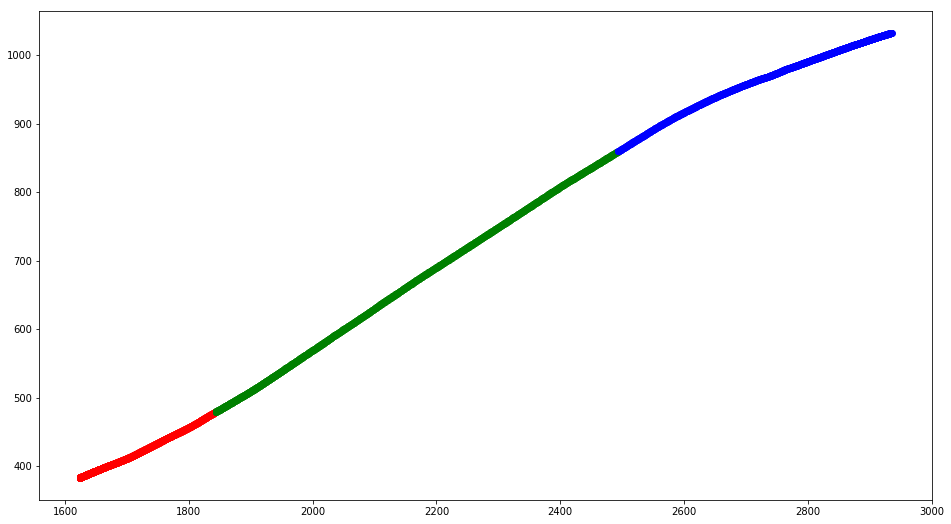

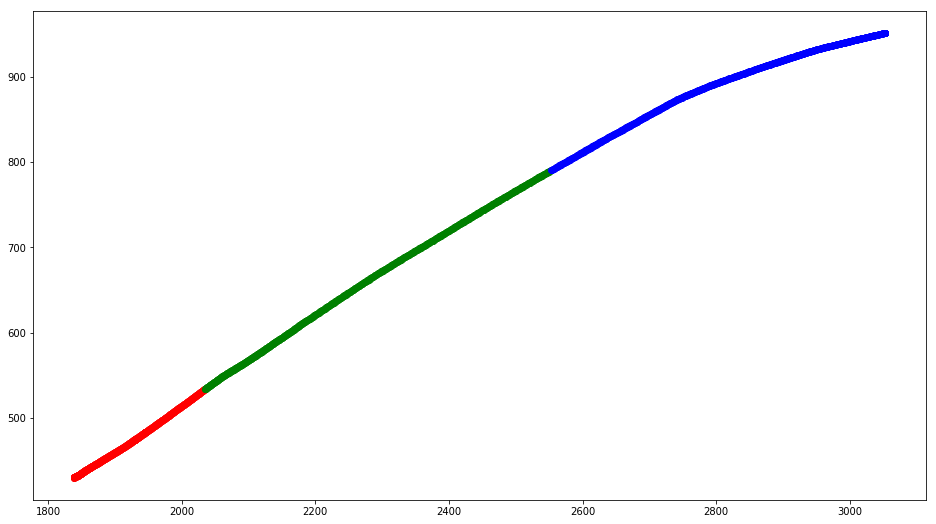

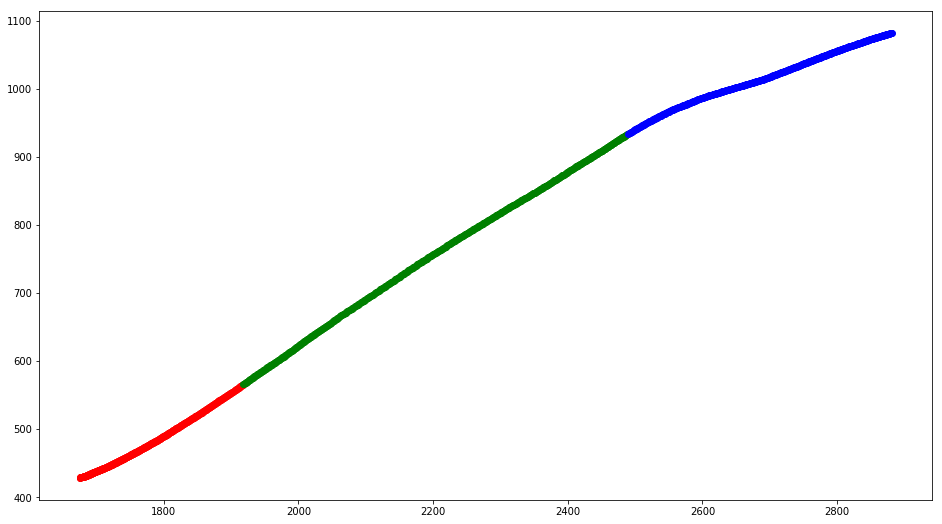

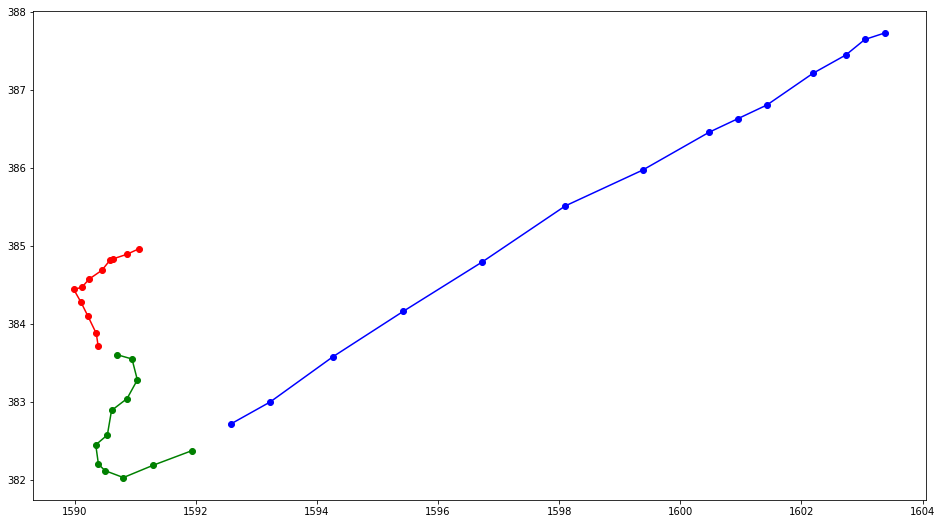

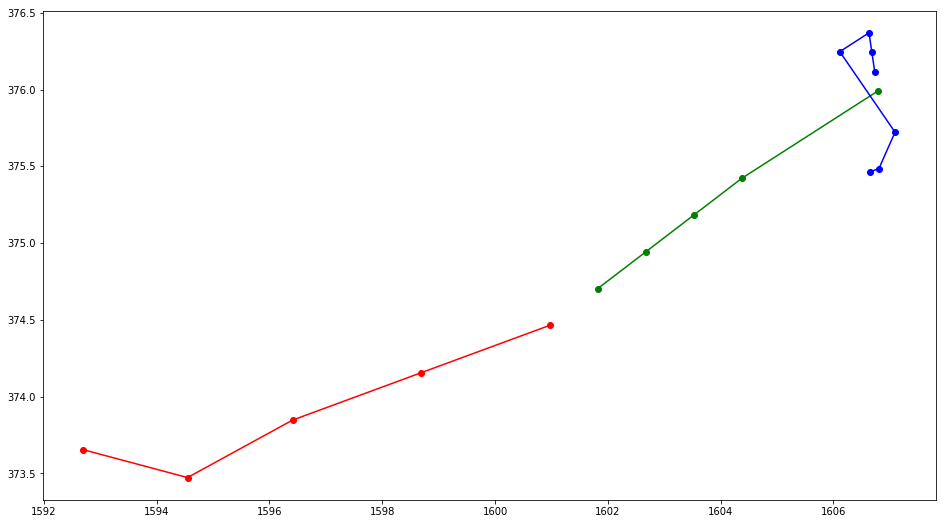

In [80]:
for chain in sorted([chain for chain in new_collected['chain_list']], reverse=True, key=len)[:5]:
    '''
    pt_arr = np.array([box['pt'] for box in chain])
    
    if len(pt_arr) <2:
        print('suppressed')
        continue
    print(len(pt_arr))
    x,y = pt_arr[:,::2].mean(axis=1),pt_arr[:,1::2].mean(axis=1)
    '''
    pt_smoothed_arr = np.array([box['pt_smoothed'] for box in chain])
    x_bar,y_bar = pt_smoothed_arr[:,::2].mean(axis=1),pt_smoothed_arr[:,1::2].mean(axis=1)
    
    plt.figure(figsize=(16,9))
    plot_trace(x_bar, y_bar)
    #plot_trace(x,y, alpha=0.3)
    plt.show()

In [66]:
chain = new_collected['chain_list'][8]
len(chain)

3320

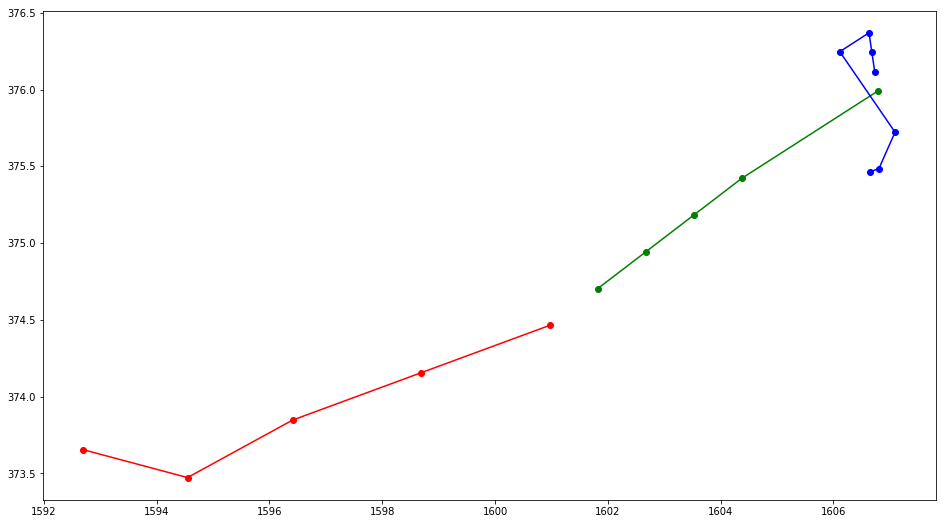

In [81]:
pt_smoothed_arr = np.array([box['pt_smoothed'] for box in chain])
x_bar,y_bar = pt_smoothed_arr[:,::2].mean(axis=1),pt_smoothed_arr[:,1::2].mean(axis=1)

plt.figure(figsize=(16,9))
plot_trace(x_bar, y_bar)
#plot_trace(x,y, alpha=0.3)
plt.show()

In [70]:
[box['frame'] for box in chain].index(1260)

0

In [71]:
[box['frame'] for box in chain].index(1270)


10

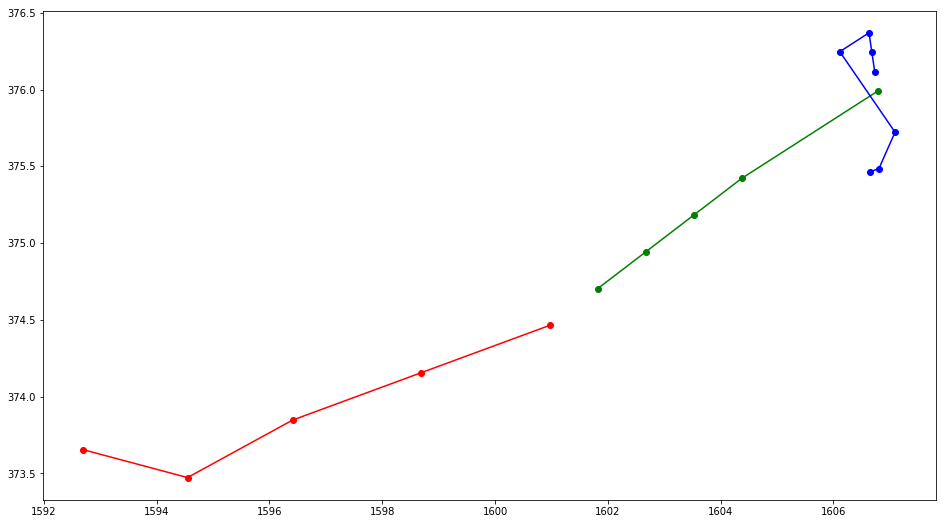

In [82]:
pt_smoothed_arr = np.array([box['pt_smoothed'] for box in chain[:30]])
x_bar,y_bar = pt_smoothed_arr[:,::2].mean(axis=1),pt_smoothed_arr[:,1::2].mean(axis=1)

plt.figure(figsize=(16,9))
plot_trace(x_bar, y_bar)
#plot_trace(x,y, alpha=0.3)
plt.show()

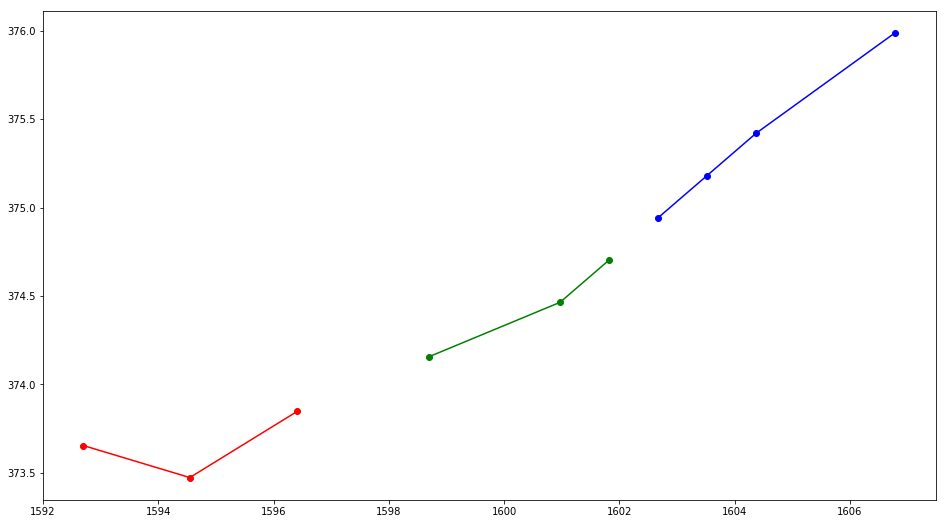

In [83]:
pt_smoothed_arr = np.array([box['pt_smoothed'] for box in chain[:10]])
x_bar,y_bar = pt_smoothed_arr[:,::2].mean(axis=1),pt_smoothed_arr[:,1::2].mean(axis=1)

plt.figure(figsize=(16,9))
plot_trace(x_bar, y_bar)
#plot_trace(x,y, alpha=0.3)
plt.show()

In [75]:
chain[:11]

[{'score': tensor(0.6026, device='cpu'),
  'label_name': 'boat',
  'pt': array([1529.2731 ,  326.16696, 1670.4028 ,  427.8315 ], dtype=float32),
  'matched': True,
  'head': True,
  'frame': 1260,
  'pt_smoothed': array([1544.5701 ,  326.84613, 1703.3302 ,  440.4729 ], dtype=float32),
  'pt_smoothed_next': array([1544.5752 ,  326.8474 , 1703.3434 ,  440.47858], dtype=float32),
  'pt_next': array([1542.3484 ,  323.90802, 1681.0935 ,  423.79886], dtype=float32),
  'delta': array([0.09130859, 0.03494263], dtype=float32),
  'delta_smoothed': array([0.09061279, 0.03560791], dtype=float32),
  'chain': <test_batch.DummyPointer at 0x1b383827278>},
 {'interpolation': True,
  'frame': 1261,
  'pt_smoothed': array([1544.5752 ,  326.8474 , 1703.3434 ,  440.47858], dtype=float32),
  'delta_smoothed': array([0.09060607, 0.03560967], dtype=float32),
  'pt_smoothed_next': array([1544.5804,  326.8487, 1703.3566,  440.4843], dtype=float32),
  'chain': <test_batch.DummyPointer at 0x1b3f220de80>},
 {'inte

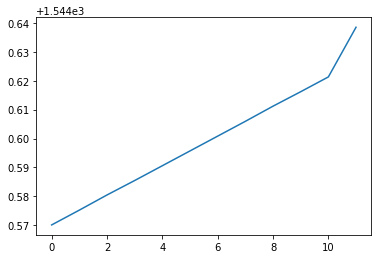

In [76]:
plt.plot([box['pt_smoothed'][0] for box in chain[:12]])

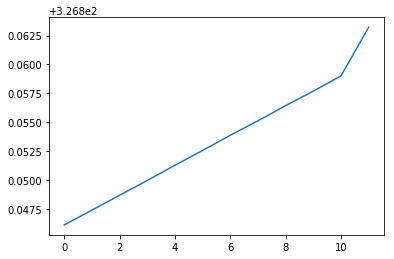

In [77]:
plt.plot([box['pt_smoothed'][1] for box in chain[:12]])

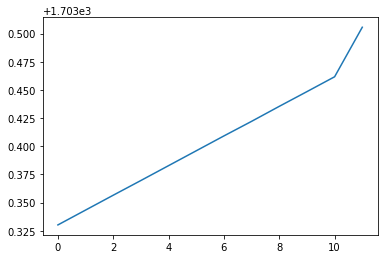

In [78]:
plt.plot([box['pt_smoothed'][2] for box in chain[:12]])

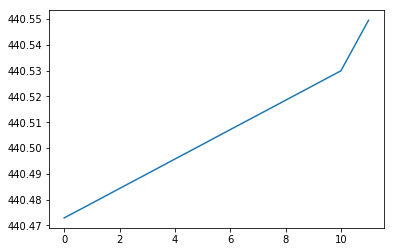

In [79]:
plt.plot([box['pt_smoothed'][3] for box in chain[:12]])